<a href="https://colab.research.google.com/github/GeorgeSherif/Machine-Learning---Bachelor-Project/blob/main/Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Polynomial Regression Assignment (Please do not remove the output cells)

## The objective is to apply polynomial regression on the provided data using 3 regularization techniques

Tasks are defined below:
1-  Read the dataset, and get acquainted with its features and labels. Check the link below for more details about the data.  
https://archive.ics.uci.edu/ml/datasets/Air+Quality  

2-  This dataset has 5 different output labels. For this assignment we only need the NO2 output. Please drop other outputs.  

3-  Handle missing data similar to what was covered in tutorial 3.  

4-  Replace the date feature with 3 separate features (Day, Month and Year).  

5-  Replace the time feature with 3 separate features (Hours, Minutes and Seconds).  

6-  Apply feature scaling.  

7-  Evaluate different degrees of lasso CV polynomial regression.  

8-  Choose the best degree and print the errors on the test data, model coefficients and the lasso parameters.  

9-  Repeat steps 4 and 5 using Ridge CV polynomial regression.  

10- Repeat steps 4 and 5 using ElasticNet CV polynomial regression.  

11- Compare the errors from the 3 regularization techniques, and save the best model.  

12- Load the best model and test it on a sample that you manually created it.  


## Enter your IDs and Names below

1- George Sherif Botros Ibrahim 46-0863
  
2- Kirollos Samir Guirguis Latif 46-1062 


### Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 1- Read the data

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Machine Learning Assignment 1/Assignment 1/AirQualityUCI.csv')
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3/10/2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,3/10/2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,3/10/2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,3/10/2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


### 2- Drop unwanted labels

In [ ]:
data = data.drop(['CO(GT)','NMHC(GT)','NOx(GT)','C6H6(GT)'],axis = 1)
data.head(10)
#data.isna()

,Date,Time,PT08.S1(CO),PT08.S2(NMHC),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3/10/2004,18:00:00,1360.0,1046.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,3/10/2004,19:00:00,1292.0,955.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,3/10/2004,20:00:00,1402.0,939.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,3/10/2004,21:00:00,1376.0,948.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1272.0,836.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
5,3/10/2004,23:00:00,1197.0,750.0,1337.0,96.0,1393.0,949.0,11.2,59.2,0.7848
6,3/11/2004,0:00:00,1185.0,690.0,1462.0,77.0,1333.0,733.0,11.3,56.8,0.7603
7,3/11/2004,1:00:00,1136.0,672.0,1453.0,76.0,1333.0,730.0,10.7,60.0,0.7702
8,3/11/2004,2:00:00,1094.0,609.0,1579.0,60.0,1276.0,620.0,10.7,59.7,0.7648
9,3/11/2004,3:00:00,1010.0,561.0,1705.0,NaN,1235.0,501.0,10.3,60.2,0.7517


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   PT08.S1(CO)    8991 non-null   float64
 3   PT08.S2(NMHC)  8991 non-null   float64
 4   PT08.S3(NOx)   8991 non-null   float64
 5   NO2(GT)        7715 non-null   float64
 6   PT08.S4(NO2)   8991 non-null   float64
 7   PT08.S5(O3)    8991 non-null   float64
 8   T              8991 non-null   float64
 9   RH             8991 non-null   float64
 10  AH             8991 non-null   float64
dtypes: float64(9), object(2)
memory usage: 804.2+ KB


### 3- Handle missing data

In [ ]:
data.isnull().sum()

Date                0
Time                0
PT08.S1(CO)       366
PT08.S2(NMHC)     366
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

In [ ]:
100* data.isnull().sum() / len(data)

Date              0.00000
Time              0.00000
PT08.S1(CO)       3.91151
PT08.S2(NMHC)     3.91151
PT08.S3(NOx)      3.91151
NO2(GT)          17.54836
PT08.S4(NO2)      3.91151
PT08.S5(O3)       3.91151
T                 3.91151
RH                3.91151
AH                3.91151
dtype: float64

In [ ]:
def percent_missing(data):
    percent_nan = 100* data.isnull().sum() / len(data)
    percent_nan = percent_nan[percent_nan>0].sort_values()
    return percent_nan

In [ ]:
percent_nan = percent_missing(data)

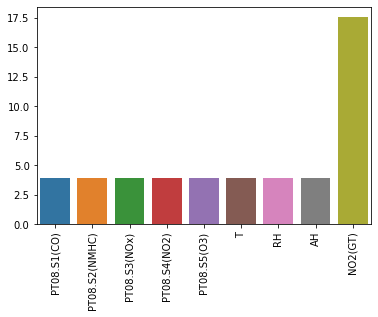

In [ ]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

In [ ]:
print(percent_nan[percent_nan < 5])

PT08.S1(CO)      3.91151
PT08.S2(NMHC)    3.91151
PT08.S3(NOx)     3.91151
PT08.S4(NO2)     3.91151
PT08.S5(O3)      3.91151
T                3.91151
RH               3.91151
AH               3.91151
dtype: float64


In [ ]:
100/len(data)

0.010687186063909372

In [ ]:
data[data['PT08.S5(O3)'].isnull()]

,Date,Time,PT08.S1(CO),PT08.S2(NMHC),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
524,4/1/2004,14:00:00,NaN,NaN,NaN,72.0,NaN,NaN,NaN,NaN,NaN
525,4/1/2004,15:00:00,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN
526,4/1/2004,16:00:00,NaN,NaN,NaN,93.0,NaN,NaN,NaN,NaN,NaN
701,4/8/2004,23:00:00,NaN,NaN,NaN,106.0,NaN,NaN,NaN,NaN,NaN
702,4/9/2004,0:00:00,NaN,NaN,NaN,109.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
8111,2/11/2005,17:00:00,NaN,NaN,NaN,326.0,NaN,NaN,NaN,NaN,NaN
8112,2/11/2005,18:00:00,NaN,NaN,NaN,284.0,NaN,NaN,NaN,NaN,NaN
8113,2/11/2005,19:00:00,NaN,NaN,NaN,289.0,NaN,NaN,NaN,NaN,NaN
8114,2/11/2005,20:00:00,NaN,NaN,NaN,215.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
data = data.dropna(axis=0,subset= ['PT08.S1(CO)','PT08.S2(NMHC)','PT08.S3(NOx)','PT08.S4(NO2)','PT08.S5(O3)','T','RH','AH','NO2(GT)'])

In [ ]:
percent_nan = percent_missing(data)
print(percent_nan)

Series([], dtype: float64)


In [ ]:
100/len(data)

0.013526308670363857

### 4- Replace date feature

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
data = data.drop('Date', axis = 1)
data.head()

,Time,PT08.S1(CO),PT08.S2(NMHC),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Year,Month,Day
0,18:00:00,1360.0,1046.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,2004,3,10
1,19:00:00,1292.0,955.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,2004,3,10
2,20:00:00,1402.0,939.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,2004,3,10
3,21:00:00,1376.0,948.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,2004,3,10
4,22:00:00,1272.0,836.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,2004,3,10


### 5- Replace time feature

In [ ]:
data['Time'] = pd.to_datetime(data['Time'])
data['Hours'] = data['Time'].dt.hour
data['Minutes'] = data['Time'].dt.minute
data['Seconds'] = data['Time'].dt.second


In [ ]:
data = data.drop('Time', axis = 1)
data.head()

,PT08.S1(CO),PT08.S2(NMHC),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Year,Month,Day,Hours,Minutes,Seconds
0,1360.0,1046.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,2004,3,10,18,0,0
1,1292.0,955.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,2004,3,10,19,0,0
2,1402.0,939.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,2004,3,10,20,0,0
3,1376.0,948.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,2004,3,10,21,0,0
4,1272.0,836.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,2004,3,10,22,0,0


### 6- Apply feature scaling

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

In [ ]:
X = data.drop('NO2(GT)',axis=1)
y = data['NO2(GT)']
scaler = StandardScaler()


### 7- Evaluate different degrees of lasso CV polynomial regression

In [ ]:
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [ ]:
# TRAINING ERROR PER DEGREE
lasso_train_rmse_errors = []
# TEST ERROR PER DEGREE
lasso_test_rmse_errors = []

for d in range(1,6):
    
    # CREATE POLY DATA SET FOR DEGREE "d"
    polynomial_converter = PolynomialFeatures(degree=d,include_bias=False)
    poly_features = polynomial_converter.fit_transform(X)
    
    # SPLIT THIS NEW POLY DATA SET
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
    
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    # TRAIN ON THIS NEW POLY SET
    lasso_cv_model = LassoCV(eps=0.1,n_alphas=100,cv=5)
    lasso_cv_model.fit(X_train,y_train)
    
    # PREDICT ON BOTH TRAIN AND TEST
    train_pred = lasso_cv_model.predict(X_train)
    test_pred = lasso_cv_model.predict(X_test)
    
    # Calculate Errors
    
    # Errors on Train Set
    lasso_train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))
    
    # Errors on Test Set
    lasso_test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))

    # Append errors to lists for plotting later
    
   
    lasso_train_rmse_errors.append(lasso_train_RMSE)
    lasso_test_rmse_errors.append(lasso_test_RMSE)
    print('Alpha of Degree ' + str(d) + ':' + str(lasso_cv_model.alpha_))
    print('Coef of Degree ' + str(d) + ':' + str(lasso_cv_model.coef_))
    print('------------------------')

Alpha of Degree 1:3.3928122729437327
Coef of Degree 1:[  0.          10.48078201  -9.834256    -0.          13.50199823
  -0.          -0.         -14.24350718   6.80780151  -0.
  -0.           4.79667506   0.           0.        ]
------------------------
Alpha of Degree 2:3.3938106840490363
Coef of Degree 2:[  0.           4.99979592  -8.74824474  -0.           9.28722428
  -0.          -0.          -0.           3.40025801  -0.
  -0.           0.           0.           0.           0.
   0.          -0.           0.           0.           0.
  -0.          -0.           0.          -0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.          -0.          -0.
   3.19875182   0.           0.           0.           0.
   0.          -0.          -0.98648244   0.          -0.
  -0.          -3.09778534  -0.          -0.          -0.
   0.           0.           0.          -0.           0.
  -0.          -0.          -0.          -0

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.306e+03, tolerance: 1.186e+03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


Alpha of Degree 4:3.4204844352613235
Coef of Degree 4:[ 0.          0.         -6.48989893 ...  0.          0.
  0.        ]
------------------------
Alpha of Degree 5:3.420592520443925
Coef of Degree 5:[ 0.          0.         -5.06784929 ...  0.          0.
  0.        ]
------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.715e+03, tolerance: 1.186e+03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


### 8- Choose the best degree and print the errors, model coefficients and the lasso parameters.

In [ ]:
lasso_train_rmse_errors

[23.83523840277192,
 23.253941336611042,
 23.278209782274516,
 23.260234309600914,
 23.21791287621566]

In [ ]:
lasso_test_rmse_errors

[23.28882199098844,
 22.49181666486186,
 22.50215452164487,
 22.46156856374286,
 22.4255055064995]

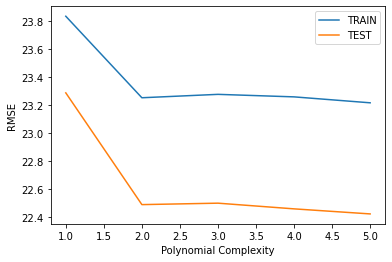

In [ ]:
plt.plot(range(1,6),lasso_train_rmse_errors[:5],label='TRAIN')
plt.plot(range(1,6),lasso_test_rmse_errors[:5],label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.legend()

Best Degree: 5

*   Alpha: 3.420592520443925
*   Coef of Degree 5: [ 0.          0.         -5.06784929 ...  0.          0 0.        ]



### 9a- Evaluate different degrees of Ridge CV polynomial regression

In [ ]:
# TRAINING ERROR PER DEGREE
ridge_train_rmse_errors = []
# TEST ERROR PER DEGREE
ridge_test_rmse_errors = []

for d in range(1,6):
    
    # CREATE POLY DATA SET FOR DEGREE "d"
    polynomial_converter = PolynomialFeatures(degree=d,include_bias=False)
    poly_features = polynomial_converter.fit_transform(X)
    
    # SPLIT THIS NEW POLY DATA SET
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
    
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    # TRAIN ON THIS NEW POLY SET
    ridge_cv_model = RidgeCV(alphas=(0.1, 1.0, 10.0),scoring='neg_mean_absolute_error')
    ridge_cv_model.fit(X_train,y_train)
    
    # PREDICT ON BOTH TRAIN AND TEST
    train_pred = ridge_cv_model.predict(X_train)
    test_pred = ridge_cv_model.predict(X_test)
    
    # Calculate Errors
    
    # Errors on Train Set
    ridge_train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))
    
    # Errors on Test Set
    ridge_test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))

    # Append errors to lists for plotting later
    
   
    ridge_train_rmse_errors.append(ridge_train_RMSE)
    ridge_test_rmse_errors.append(ridge_test_RMSE)
    print('Alpha of Degree ' + str(d) + ': ' + str(ridge_cv_model.alpha_))
    print('Coef of Degree ' + str(d) + ': ' + str(ridge_cv_model.coef_))
    print('------------------------')

Alpha of Degree 1: 1.0
Coef of Degree 1: [ -1.38909335  33.38580552  -6.05848304 -24.84172401  15.33066703
   7.58067646   2.13040136  -9.85098933   4.76374758  -4.37455087
  -0.05421837   5.08665782   0.           0.        ]
------------------------
Alpha of Degree 2: 0.1
Coef of Degree 2: [  20.29285473   24.83128132  -34.32999727  -73.14785239  -10.09884072
  -23.22891061    1.93766189  -25.45695072    3.48417222    5.63905743
   -7.05595774   -3.96934742    0.            0.          -66.2491785
   45.40870757    0.91843353  -35.1964003    82.32646423    6.93182253
   44.19644976  -41.24611724   25.93959995   -7.25693134   -5.96332138
    4.8609492     0.            0.         -105.59410808  -18.52548974
   84.51114724   48.74760005   65.51567318   23.5479525   -81.08833454
   31.19456479   -3.51302924   24.29255347   13.39539344    0.
    0.           16.67211761   73.25681104    8.2307736    -9.06275102
  -15.59488345   -6.68696006  -40.93512309   21.29385745   13.67778203
   -5.

### 9b- Choose the best degree and print the errors, model coefficients and the Ridge parameters.

In [ ]:
ridge_train_rmse_errors

[22.104446314771774,
 18.31075933853167,
 15.659403038696725,
 13.503887450140512,
 11.7312327402507]

In [ ]:
ridge_test_rmse_errors

[22.22581865332586,
 18.708606605475477,
 17.090517684064846,
 17.96461093175888,
 21.679988470483156]

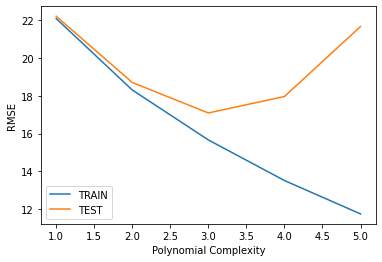

In [ ]:
plt.plot(range(1,6),ridge_train_rmse_errors[:5],label='TRAIN')
plt.plot(range(1,6),ridge_test_rmse_errors[:5],label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.legend()

The best degree is 3 

*   Alpha: 0.1

*   Coef: [ 1.11610738e+01  2.55564377e+01 -1.54939952e+01 -2.56727328e+01
  2.84074830e+01 -5.98963550e+00  8.61509958e+00  1.19114508e+00
  2.27173410e+00  4.47935429e+00 -2.31281533e+01 -1.44116997e+01
  0.00000000e+00  0.00000000e+00 -1.75552422e+01  7.83861071e+00
 -1.31129269e+01 -4.52601778e+01  6.68980166e+00  1.56483556e+01
 -4.67632624e+00 -1.34058940e+01  1.11076666e+01 -3.21563023e+01
  4.43331748e+01 -1.99016493e+01  0.00000000e+00  0.00000000e+00
 -2.91690501e+01 -2.33429139e+00 -3.19770867e+00  9.47188523e+00
  2.10864331e+01  1.04113567e+01 -6.53467029e+00  2.54313712e+01
  4.35726517e+01 -2.81920052e-01 -2.32018047e+01  0.00000000e+00
  0.00000000e+00  3.53406007e+01  7.76616115e+00 -3.86220843e+00
 -7.12595287e+00 -1.07016834e+01 -1.82707759e+01 -1.53851737e+01
  1.11795874e+01  2.33285204e+01  2.17731934e+01  0.00000000e+00
  0.00000000e+00  4.76672862e+00 -3.72282538e+01  2.74179849e+01
  1.12365294e+01  1.62948913e+01 -2.57377060e+01  1.02482861e+01
 -8.89369852e+00  3.71152029e+01  0.00000000e+00  0.00000000e+00
 -1.12080701e+01 -4.98613186e+01 -6.39486030e+00 -1.82570154e+01
  2.85224972e+01 -3.95226741e+00  1.09397217e+00  1.39489021e+01
  0.00000000e+00  0.00000000e+00 -4.34947731e+00 -4.04143086e+00
  3.38030253e+01 -6.15744982e+00  9.52082221e+00 -7.32706644e+00
 -5.58170559e+00  0.00000000e+00  0.00000000e+00  6.31714554e-02
 -1.68380707e+01  9.24678109e+00  1.87479517e+00 -6.67229993e+00
 -1.49154581e+01  0.00000000e+00  0.00000000e+00  1.73035349e+01
  1.38335332e+00 -5.60749271e+01 -2.25198230e-01  1.64588964e+01
  0.00000000e+00  0.00000000e+00  2.27173410e+00  4.07012061e+00
 -2.22835607e+01 -1.37147558e+01  0.00000000e+00  0.00000000e+00
 -5.81850849e+01  4.98082790e+01  1.87850383e+01  0.00000000e+00
  0.00000000e+00 -5.76285303e+00  1.06679724e+01  0.00000000e+00
  0.00000000e+00  3.37024551e+01  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.59248208e+00
  2.50320503e+01 -2.10716651e-02 -7.73934529e+00  1.71270691e+01
  6.41583191e+00 -9.90446135e+00 -2.82174688e+01 -1.77563194e+01
 -3.04544375e+01  8.21453341e+00 -1.45311296e+01  0.00000000e+00
  0.00000000e+00  1.54734623e+01  4.95519877e+01  1.28795324e+01
  9.23475444e+00  3.58330028e-02  6.72528607e+00 -2.00549802e+01
  7.62717077e+00 -2.85920917e-01  7.63503292e-03  1.05268326e+01
  0.00000000e+00  0.00000000e+00  5.64128825e+00 -3.98314866e+00
  2.75990904e+00  1.42340186e+01  1.29653078e+01  1.24326472e+01
 -1.25848334e+01 -4.97083641e+01 -1.95953491e+01  2.24531326e+01
  0.00000000e+00  0.00000000e+00 -3.14698358e+00 -1.19342884e+01
 -1.96601635e+01  4.54791483e+01 -8.48716889e+00 -4.54657150e+01
  6.09958957e+00 -7.03641434e+01  9.11174699e+00  0.00000000e+00
  0.00000000e+00  1.63426271e+01  3.32703667e+00  2.21109153e+01
  2.39917717e+01  6.57985260e+00 -3.51113861e+01 -1.24836437e+00
  1.01661335e+01  0.00000000e+00  0.00000000e+00  5.39590254e+00
  4.95969630e+01 -2.43935801e+01  1.53821921e+01  6.39709269e+01
 -1.38081491e+01 -4.36833364e+00  0.00000000e+00  0.00000000e+00
 -2.63037796e+01  4.22492726e+01 -4.33170596e+00  8.18120821e+01
  3.87028610e+00 -1.11669141e+01  0.00000000e+00  0.00000000e+00
 -9.80153600e+00 -1.34745993e+01  2.66967753e+01 -4.22403690e+01
  5.65214582e+00  0.00000000e+00  0.00000000e+00  1.10542319e+01
 -3.26142542e+01  4.51967782e+01 -1.90997519e+01  0.00000000e+00
  0.00000000e+00  7.98526402e-01  4.17356752e+01 -1.73755937e+01
  0.00000000e+00  0.00000000e+00  5.67108243e+00 -2.23238417e+01
  0.00000000e+00  0.00000000e+00  2.49074178e+01  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -1.79993638e+01 -4.10642440e+01  8.33361196e+00  1.66127748e+01
 -3.49903643e+01 -8.76517371e+00 -9.24024039e+00 -2.94516927e+01
  3.68307330e+01  1.57181764e+01 -1.87410664e+01  0.00000000e+00
  0.00000000e+00 -9.29251652e+00  5.73603653e+00  2.15030250e+01
 -1.97189310e+01  5.48479927e+00 -4.46737950e+01 -1.64636322e+00
  3.77290310e+01 -1.75292297e+01 -2.84379367e+01  0.00000000e+00
  0.00000000e+00  2.03935278e+01  3.62281461e+00  2.39231688e+01
 -3.24169155e+00  3.61789290e+01 -3.38132430e+00 -4.09385690e+01
 -1.26193434e+01  3.55292405e+01  0.00000000e+00  0.00000000e+00
  9.33839201e+00 -4.93124253e+01 -3.60990263e+01 -1.42895730e+01
  9.26014459e+00  3.51477901e+01  2.49562303e+00  6.81891828e+00
  0.00000000e+00  0.00000000e+00  2.27859537e+01 -7.91325027e+01
  4.37874216e+01  2.08024995e+01  5.64897454e+00 -3.47119319e+00
  7.37944189e+01  0.00000000e+00  0.00000000e+00  1.36790793e+01
 -3.91763686e+01  1.08359197e+01  7.19657748e+00 -1.28237087e+01
  5.13977235e+01  0.00000000e+00  0.00000000e+00  6.45265612e+01
 -6.62464815e+00 -4.85172877e+01  8.73153596e+01 -1.02278327e+01
  0.00000000e+00  0.00000000e+00  2.53062261e+01  4.31866841e+01
  4.75983498e-01 -2.24104791e+01  0.00000000e+00  0.00000000e+00
 -1.00865000e+02 -9.33767495e+01  1.79959703e+01  0.00000000e+00
  0.00000000e+00  2.33611955e+01  1.11881516e+01  0.00000000e+00
  0.00000000e+00 -3.01143239e+01  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.49329923e+01
  1.23324653e+01  1.44507903e+00 -2.20053951e+00 -1.07888414e+01
 -1.50123050e+01  3.54095739e+01 -1.00043414e+01 -1.10709921e+01
 -5.55621364e+00  0.00000000e+00  0.00000000e+00  5.00686425e+01
 -1.20842965e+01 -5.42708871e-02  3.68435906e+00 -5.58623453e+01
  8.20507766e+00 -4.98407624e+01  5.93934206e+01 -5.27233227e+01
  0.00000000e+00  0.00000000e+00 -3.49629002e+01 -4.28392574e+00
 -1.63428686e+01  6.40096441e+01 -2.72745106e+00  2.29885082e+01
  8.88232662e+00  1.63771366e+01  0.00000000e+00  0.00000000e+00
 -5.62491076e+00  2.26344388e+01  5.52183120e+01 -7.05436800e+00
 -7.89886685e+00 -1.58786696e+01 -2.88528190e+00  0.00000000e+00
  0.00000000e+00  1.71423634e+01 -1.76433739e+01 -1.01039065e+01
  2.63907506e+01 -3.84237394e+01 -1.67054165e+01  0.00000000e+00
  0.00000000e+00  6.91653604e+00 -1.77412666e+01  2.08428078e+01
  3.18377450e+01  1.96844435e+01  0.00000000e+00  0.00000000e+00
 -1.52762947e+01  1.10207829e+01  2.41087898e+01  2.22968533e+01
  0.00000000e+00  0.00000000e+00  2.45580554e+01 -1.86097670e+01
  3.75561671e+00  0.00000000e+00  0.00000000e+00 -4.00773806e+00
 -3.13832673e+00  0.00000000e+00  0.00000000e+00  1.59954087e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  2.17920265e+01 -2.98536133e+01  1.72367623e+01
 -1.54587692e+01  1.12553676e+01  4.65656076e+00 -5.64660323e+01
 -5.99471819e+00 -4.67843367e+01  0.00000000e+00  0.00000000e+00
  3.38875712e+01  3.29547425e+01 -1.64849673e+01  1.33301205e+01
 -3.73666719e+01 -1.79375869e+00  4.26330997e+01  2.23330962e+01
  0.00000000e+00  0.00000000e+00 -7.39387985e+01  3.08799771e+01
 -1.30144940e+01  2.72488560e+01  6.59955259e+01  3.17903981e+00
 -2.70352910e+00  0.00000000e+00  0.00000000e+00  1.95515978e+01
 -4.84714351e+01  1.16130215e+01 -1.44801008e+00  6.53169805e+00
  2.36382000e+01  0.00000000e+00  0.00000000e+00 -2.21883272e+01
  1.62896388e+01 -5.05402856e+00  5.12594984e+01 -6.04303587e+01
  0.00000000e+00  0.00000000e+00 -2.58027387e+01  9.77695229e+00
 -8.28442340e+00  3.79891599e+01  0.00000000e+00  0.00000000e+00
  1.53291835e+02  2.57654905e+01 -7.92852840e+00  0.00000000e+00
  0.00000000e+00 -5.89991499e+01  1.19070676e+01  0.00000000e+00
  0.00000000e+00  8.16014282e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -3.95497112e+01
  3.46382656e+01  1.82799438e+01  2.67362442e+01 -1.14836031e+01
  1.62083145e+01 -4.77955611e+00 -1.39385621e+01  0.00000000e+00
  0.00000000e+00  2.22982120e+01  2.21463274e+01  1.17829310e+01
 -5.01579812e+01 -1.03233276e+01 -4.17492823e+00 -3.88148255e+01
  0.00000000e+00  0.00000000e+00 -3.04072373e+01  1.22542033e+01
 -5.96322938e+00 -1.19279202e-01 -3.20650702e+01 -2.16211727e+01
  0.00000000e+00  0.00000000e+00 -4.68954469e+01 -1.83384764e+01
 -8.96515580e+00 -2.79474433e+01  1.86706002e+01  0.00000000e+00
  0.00000000e+00  2.86375170e+01 -4.33392836e+00  1.68328315e+00
  1.49093031e+01  0.00000000e+00  0.00000000e+00 -1.72345240e+01
  1.51617919e+01 -2.32394661e+00  0.00000000e+00  0.00000000e+00
  3.62482130e+00 -5.39147619e+00  0.00000000e+00  0.00000000e+00
 -1.27644403e+01  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -2.03976627e-01 -3.91510470e+01
 -9.12392500e+00 -4.28044975e+00  1.40345856e+01  4.73673241e+01
 -3.31690532e+01  0.00000000e+00  0.00000000e+00  5.37980570e+00
  1.93325416e+01 -4.24453309e+00  4.05440804e+01  1.00754622e+00
 -8.88123136e+00  0.00000000e+00  0.00000000e+00 -1.75813623e+01
  3.39442665e+01 -3.28684340e+01 -9.01460716e+01  1.71250101e+01
  0.00000000e+00  0.00000000e+00 -6.32537397e+00  9.22279218e+00
 -7.29217943e+00 -5.50820148e+00  0.00000000e+00  0.00000000e+00
 -2.07363876e+01 -8.25881004e+01 -2.53498431e+01  0.00000000e+00
  0.00000000e+00  1.93492362e+01 -3.82981444e+00  0.00000000e+00
  0.00000000e+00  3.12828726e+01  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  1.05164444e+01
 -3.15489018e+01  6.26380541e-01  6.06938671e+00  5.13527693e+01
  1.49038505e+01  0.00000000e+00  0.00000000e+00  3.76104044e+01
 -1.67950654e+01  2.74747538e+01 -2.88331720e+01 -3.53911746e+01
  0.00000000e+00  0.00000000e+00  9.87850353e+00  1.70705797e+00
 -5.43656323e+00 -1.35852448e+01  0.00000000e+00  0.00000000e+00
 -5.05155748e+01 -1.04298458e+02  7.45268949e-01  0.00000000e+00
  0.00000000e+00  5.34440733e+00  6.24950232e+00  0.00000000e+00
  0.00000000e+00  1.84068549e+01  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  2.53786274e+01
  1.73821353e+01 -6.23409651e+01 -2.70087695e+01  1.75295661e+01
  0.00000000e+00  0.00000000e+00  1.57570923e+00 -5.63621219e+01
 -5.84313999e-02  1.70003562e+01  0.00000000e+00  0.00000000e+00
  2.24784531e+01  9.78982032e+01  2.55147943e+01  0.00000000e+00
  0.00000000e+00  4.83932412e+01 -2.14477310e+00  0.00000000e+00
  0.00000000e+00 -2.24045504e+01  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  2.27173410e+00
  3.66061080e+00 -2.14387538e+01 -1.30176548e+01  0.00000000e+00
  0.00000000e+00 -5.85656278e+01  4.99969610e+01  1.86959643e+01
  0.00000000e+00  0.00000000e+00 -5.01382240e+00  1.20785252e+01
  0.00000000e+00  0.00000000e+00  3.45933507e+01  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  3.55946782e+01  4.04118272e+01 -2.77004537e+01  0.00000000e+00
  0.00000000e+00 -3.50666183e+01 -8.97658990e+00  0.00000000e+00
  0.00000000e+00 -1.39196211e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  3.11394482e+00
 -7.16287559e+00  0.00000000e+00  0.00000000e+00 -2.79321427e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -5.80588480e+01  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00]

### 10a- Evaluate different degrees of ElasticNet CV polynomial regression

In [ ]:
from sklearn.linear_model import ElasticNetCV

In [ ]:
# TRAINING ERROR PER DEGREE
elastic_train_rmse_errors = []
# TEST ERROR PER DEGREE
elastic_test_rmse_errors = []

for d in range(1,6):
    
    # CREATE POLY DATA SET FOR DEGREE "d"
    polynomial_converter = PolynomialFeatures(degree=d,include_bias=False)
    poly_features = polynomial_converter.fit_transform(X)
    
    # SPLIT THIS NEW POLY DATA SET
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
    
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    # TRAIN ON THIS NEW POLY SET
    elastic_model = ElasticNetCV(l1_ratio=[.1, .5, .7,.9, .95, .99, 1],tol=0.01)
    elastic_model.fit(X_train,y_train)
    
    # PREDICT ON BOTH TRAIN AND TEST
    train_pred = elastic_model.predict(X_train)
    test_pred = elastic_model.predict(X_test)
    
    # Calculate Errors
    
    # Errors on Train Set
    elastic_train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))
    
    # Errors on Test Set
    elastic_test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))

    # Append errors to lists for plotting later
    
   
    elastic_train_rmse_errors.append(elastic_train_RMSE)
    elastic_test_rmse_errors.append(elastic_test_RMSE)
    print('Coeff of Degree ' + str(d) + ': ' + str(elastic_model.coef_))
    print('Ratio of Degree ' + str(d) + ': ' + str(elastic_model.l1_ratio_))
    print('------------------------')

Coeff of Degree 1: [ -0.6809464   31.55043156  -6.19063386 -23.03416065  15.14995108
   6.36232817   1.06231531  -9.75305295   5.47128191  -3.52590945
  -0.           5.10253624   0.           0.        ]
Ratio of Degree 1: 1.0
------------------------
Coeff of Degree 2: [ 2.38970201e+01  1.99463967e+01 -2.27444909e+01 -6.03669040e+00
  1.99162102e-01 -4.28156456e-01 -0.00000000e+00 -7.73522676e-01
  8.54506899e-01  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -2.44938785e+01  1.03575162e+01 -1.50151891e+01
  3.05232897e+00 -1.84601206e+00  0.00000000e+00  1.14385315e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -5.62846159e-01 -6.77011799e-01  3.62923464e-01
  2.38530514e+01  0.00000000e+00  0.00000000e+00  7.11970132e-01
  1.84600210e+00  0.00000000e+00  3.73519007e+00  0.00000000e+00
  0.00000000e+00  1.03441633e+01  2.51609317e+01 -0.00000000e+00
 -0.00000000e

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.356e+05, tolerance: 1.186e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


Coeff of Degree 4: [ 21.55026835  21.43010382 -11.17399483 ...   0.           0.
   0.        ]
Ratio of Degree 4: 1.0
------------------------
Coeff of Degree 5: [20.59122126 15.15471506 -8.98757704 ...  0.          0.
  0.        ]
Ratio of Degree 5: 1.0
------------------------


### 10b- Choose the best degree and print the errors, model coefficients and ElasticNet parameters.

In [ ]:
elastic_train_rmse_errors

[22.110998256687473,
 19.064314828317162,
 17.58565917257368,
 16.870991907133046,
 16.381940243408867]

In [ ]:
elastic_test_rmse_errors

[22.17002763503895,
 19.27326364404127,
 18.1056557644868,
 17.524356684173878,
 17.264858088309765]

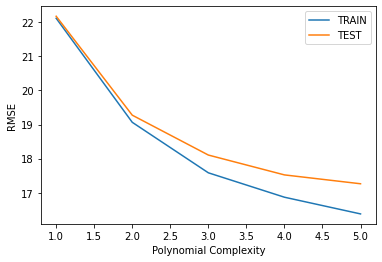

In [ ]:
plt.plot(range(1,6),elastic_train_rmse_errors[:5],label='TRAIN')
plt.plot(range(1,6),elastic_test_rmse_errors[:5],label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.legend()

Best Degree: 5

*   l1_ratio : 1
*   Coef of Degree 5: [20.59122126 15.15471506 -8.98757704 ...  0.          0.0.        ]



### 11- Compare the errors from the 3 regularization techniques, and save the best model.

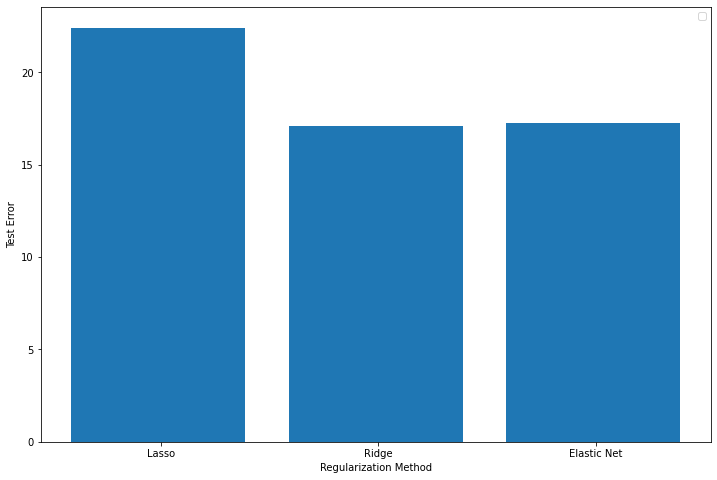

In [ ]:
errors = [22.4255055064995, 17.090517684064846,17.264858088309765]

barWidth = 0.3
fig = plt.subplots(figsize =(12, 8))
br1 = np.arange(len(errors))
br2 = [x + barWidth + 1 for x in br1]

# Make the plot
plt.bar(br1, errors)

# Adding Xticks
plt.xlabel('Regularization Method')
plt.ylabel('Test Error')
plt.xticks([r + (barWidth*0.04) for r in range(len(errors))],
        ['Lasso', 'Ridge', 'Elastic Net'])

plt.legend()
plt.show()

Ridge is the best model with degree 3.

In [ ]:
final_poly_converter = PolynomialFeatures(degree=3,include_bias=False)
poly_features = final_poly_converter.fit_transform(X)
    
# SPLIT THIS NEW POLY DATA SET
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
    
scaler.fit(X_train)
X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test)
    
# TRAIN ON THIS NEW POLY SET
final_model = RidgeCV(alphas=(0.1, 1.0, 10.0),scoring='neg_mean_absolute_error')
final_model.fit(X_train,y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), scoring='neg_mean_absolute_error')

In [ ]:
from joblib import dump, load
dump(final_model, 'Poly_best.joblib') 
dump(final_poly_converter,'poly_converter.joblib')

['poly_converter.joblib']

### 12- Load the best model and test it on a sample that you manually created it.

In [ ]:
from joblib import dump, load
loaded_poly = load('poly_converter.joblib')
loaded_model = load('Poly_best.joblib')

In [ ]:
trial = [[1205,901,760,1174,1529,24.9,25.7,0.7778,2005,6,5,18,0,0]]
trial_poly = loaded_poly.transform(trial)
final_test_input = scaler.transform(trial_poly)
loaded_model.predict(final_test_input)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


array([170.33992397])

## Great work!
----